In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#for neural network
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras.models import Sequential, Model, load_model
from keras.layers import Reshape, Dense, Input
from sklearn.model_selection import train_test_split
import keras_tuner as kt

import sys
np.set_printoptions(threshold=sys.maxsize)


# Data

In [2]:
df=pd.read_csv('/Users/vedantgupta/Documents/summer project/data-analysis-with-technical-indicators-1/nifty_sensex_close_data/data/M&M.NS_2011_to_2023.csv')

In [37]:
df_close=df['M&M.NS_close']
df_close
df_close = df_close.astype(float)
df_close.shape

n=615 #number of data points
w=124 #window size
#training array
trainval_arr_inp=np.zeros([n-w,w]) #input array

#filling the input array
for i in range (n-w):
    for j in range(w):
        trainval_arr_inp[i][j]=df_close[i+j]

#output array
trainval_arr_out=np.array([df_close[i+w] for i in range(n-w)])
trainval_arr_out=trainval_arr_out.reshape(n-w,1)
trainval_arr_out.shape

trainval_arr=np.column_stack((trainval_arr_inp,trainval_arr_out)) #training array

#shuffle the rows
np.random.seed(0)
np.random.shuffle(trainval_arr)

trainval_arr_inp1=trainval_arr[:,:-1]
trainval_arr_out1=trainval_arr[:,-1]

In [4]:
train_arr=trainval_arr[:int(0.7*(n-w)),:] #training array
val_arr=trainval_arr[int(0.7*(n-w)):,:] #validation array

X_train=train_arr[:,:-1]
y_train=train_arr[:,-1]

X_val=val_arr[:,:-1]
y_val=val_arr[:,-1]

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)


(343, 124)
(343,)
(148, 124)
(148,)


In [5]:
testadata = np.zeros(w)
for i in range(w):
    testadata[i] = df_close[n+i]
testdata = testadata.reshape(1, w)
print(testdata.shape)

df_close[n+w]

(1, 124)


435.1484375

# Model


In [12]:
initalizer2 = keras.initializers.HeNormal

In [15]:
# Clear existing model
tf.keras.backend.clear_session()
# define model
model1 = Sequential()
model1.add(Dense(32, input_shape=(w,), activation='relu', name = 'Input', kernel_initializer=initalizer2)) #input layer
model1.add(Dense(64, activation='relu', kernel_initializer=initalizer2))
model1.add(Dense(32, activation='relu', kernel_initializer=initalizer2))
model1.add(Dense(1, name = 'Output')) # output layer
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (Dense)                   │ (None, 32)             │         4,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,225 (32.13 KB)

 Trainable params: 8,225 (32.13 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
model1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005), loss=['mse'],metrics=['mape'] )

In [80]:
history = model1.fit(X_train,y_train,validation_data=(X_val,y_val) , epochs=100, batch_size=20)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2979.0930 - mape: 12.2673 - val_loss: 1099.1824 - val_mape: 7.8726
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 589.9972 - mape: 5.5688 - val_loss: 396.7043 - val_mape: 4.9087
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 263.7001 - mape: 3.7411 - val_loss: 110.7984 - val_mape: 2.3602
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 122.6410 - mape: 2.4406 - val_loss: 84.8204 - val_mape: 2.0388
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 111.3612 - mape: 2.3255 - val_loss: 98.4383 - val_mape: 2.1432
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 95.6298 - mape: 2.1404 - val_loss: 81.1060 - val_mape: 1.9722
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 113.2998 - mape: 2.3481 - val_loss: 176.6529 - val_mape: 3.1463
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 103.0078 - mape: 2.2178 - val_loss: 83.6905 - val_mape: 2.0019
Epoch 9/100
18/18 

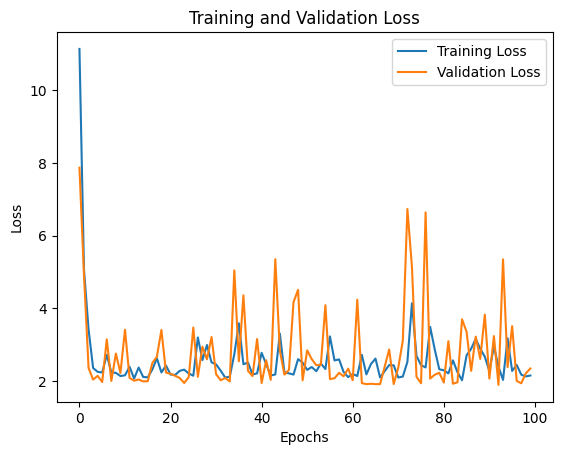

In [83]:
# Plot epochs vs. loss
plt.plot(history.history['mape'], label='Training Loss')
plt.plot(history.history['val_mape'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [84]:
def model_builder(hp):
  model = keras.Sequential()
  act = hp.Choice('activation', values=['relu','sigmoid', 'tanh'])
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  hl = hp.Int('layers', min_value=2, max_value=6, step=1)
  model.add(Dense(hp_units, input_shape=(w,), activation=act, name = 'Input'))
  for i in range(hl):
    model.add(Dense(units=hp_units, activation=act))
  model.add(Dense(1))
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate), loss='mse',metrics=['mape'] )
  return model

In [89]:
tuner = kt.Hyperband(model_builder,objective=kt.Objective("val_mape", direction="min"),max_epochs=10,factor=3,directory='my_dir',project_name='intro_to_kt')

In [90]:
tuner.search(X_train,y_train, epochs=100, batch_size=25, validation_data=(X_val,y_val))

Trial 30 Complete [00h 00m 02s]
val_mape: 3.0920088291168213

Best val_mape So Far: 2.9990334510803223
Total elapsed time: 00h 00m 55s


In [91]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps

In [92]:
model = tuner.hypermodel.build(best_hps)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (Dense)                   │ (None, 416)            │        52,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 416)            │       173,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 416)            │       173,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 416)            │       173,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 416)            │       173,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 416)            │       173,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           417 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 919,777 (3.51 MB)

 Trainable params: 919,777 (3.51 MB)

 Non-trainable params: 0 (0.00 B)

In [93]:
# Train the model
history = model.fit(X_train,y_train,validation_data=(X_val,y_val), epochs=100, batch_size=25)


Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 49201.3398 - mape: 53.5234 - val_loss: 1962.6267 - val_mape: 10.9648
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1801.7340 - mape: 9.3485 - val_loss: 1826.8900 - val_mape: 10.5875
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1313.1418 - mape: 8.4250 - val_loss: 717.8834 - val_mape: 6.0222
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 672.3299 - mape: 5.9704 - val_loss: 531.5632 - val_mape: 5.4551
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 542.4656 - mape: 5.3874 - val_loss: 469.0241 - val_mape: 5.1609
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 466.4559 - mape: 4.9859 - val_loss: 397.6327 - val_mape: 4.6337
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 437.4885 - mape: 4.7416 - val_loss: 349.3247 - val_mape: 4.2817
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 370.7689 - mape: 4.4038 - val_loss: 309.7166 - val_mape: 3.9956
Epoch 

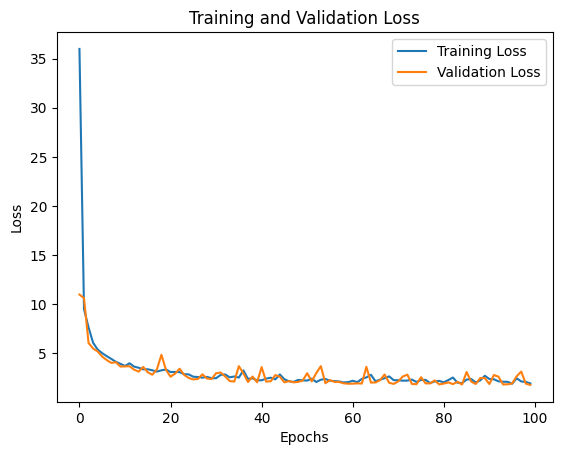

In [100]:
#plotting the training and validation loss
plt.plot(history.history['mape'], label='Training Loss')
plt.plot(history.history['val_mape'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [95]:
y_pred = model.predict(testdata)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[434.77332]], dtype=float32)

In [103]:
print('predicted value',y_pred)
print('actual value',df_close[n+w])

#mae

mae = np.mean(np.abs(y_pred - df_close[n+w]))
print('mae',mae)

#accuracy

accuracy = 1 - mae/df_close[n+w]
print('accuracy',accuracy)



predicted value [[434.77332]]
actual value 435.1484375
mae 0.37512207
accuracy 0.9991379445771019
